# **Map Parts**

## **1 Part1 구역 분할하기**
나머지 지역 필터링 2개 구역 22명: 3X7 + 4X4 = 37  

In [1]:
import pandas as pd
table = pd.read_csv('data/stores01.csv') # .reset_index()
table['display'] = True
# table['label'] = 0
table.tail(3)

,title,no,part,address,dong,name,phone,telephone,order,lon,lat,label,color,display
35,반짝반짝윤,623-32-00444,이·미용업,"은천로2길 39, 103호",은천동,윤지은,010-3952-0089,NaN,내외부 공간개선,126.938882,37.485491,1,antiquewhite,True
36,글로리아,119-21-49165,의류판매,은천로 50,은천동,민준희,010-8487-9243,NaN,"외부페인팅, 어닝 등",126.940823,37.485996,1,antiquewhite,True
37,으뜸할인마트,119-21-64093,슈퍼마켓,봉천로29길 21,은천동,백은자,010-4166-0667,070-7868-3522,NaN,126.940687,37.485164,1,antiquewhite,True


In [2]:
# 9, 10 ,11  : 3개 구역 추가작업 필요
cluster_lists = [
    [0 ,1 ,2 ,3 ], # 2
    [6, 7, 14,15], # 4,5
    [4 , 5,19],  # 6,7
    [8 ,16,18], # 1,9
    [9 ,10,11],
    [12,13,17],
    [20,21,22],
    [23,24,25],
    [26,27,28,29],
    [30,32,35,37],
    [31,33,34,36],
]

In [3]:
from data.arterior import table_index
from data.arterior import table_clusters
for no,_ in enumerate(cluster_lists):
    table = table_index(table, _, no+1)
table = table.reset_index()

# Color Indexing
for no,_ in enumerate(cluster_lists):
    table = table_clusters(table, _, no+1)
table['display'] = list(map(lambda x : True if (x == False) else False, table['display']))
table.head(3)

,index,title,no,part,address,dong,name,phone,telephone,order,lon,lat,label,color,display,cluster
0,0,도모다찌,119-19-40142,음식점,봉천로 219-5,보라매동,황세철,010-9353-7719,NaN,간판,126.926024,37.490392,1,purple,True,1.0
1,1,원양참치,119-15-41672,음식점,봉천로 219-9,보라매동,노영임,010-6361-8743,02-868-5151,벽화(참치집 이미지),126.926183,37.490540,1,purple,True,1.0
2,2,만나칼국수,607-56-07534,음식점,봉천로7길 23,보라매동,김미영,010-4232-6428,02-858-7404,유리부착식 간판 리뉴얼,126.926378,37.490513,1,purple,True,1.0


In [4]:
from data.arterior import MapFolium
maplot = MapFolium()
# table_index = table[table['display']==True].index
# table.loc[table_index, 'color'] = 'red'
map_instance = maplot.plot(table, number='index', opacity=0.8)
map_instance
# map_instance.save('data/map_part1.html')

## **2 Part2, 3 구역 분할하기**
나머지 지역 필터링 2개 구역 22명: 3X7 + 4X4 = 37  

In [5]:
import pandas as pd
table = pd.read_csv('data/stores023.csv').drop(['label'], axis=1)
table['display'] = True
table['label'] = 0
table.tail(3)

,title,no,part,address,dong,name,phone,telephone,order,lon,lat,color,display,label
71,설기야,119-20-20685,떡방앗간,"봉천로29길 64-3, 1층",은천동,박영길,010-5630-0009,02-876-0915,"외부간판, 메뉴판 디자인 교체",126.943064,37.485637,antiquewhite,True,0
72,카페작은거리,310-07-70135,카페,"봉천로33길 6, 2층",은천동,이용희,010-9760-7370,02-6414-2046,"윈도우페이팅, 디스플레이 디자인",126.943797,37.483423,antiquewhite,True,0
73,이상범스시,437-14-00723,음식점,봉천로 407-1,은천동,이상범,010-5508-5913,02-883-5913,"실내페인팅, 메뉴개선, 바닥교체",126.945330,37.483144,azure,True,0


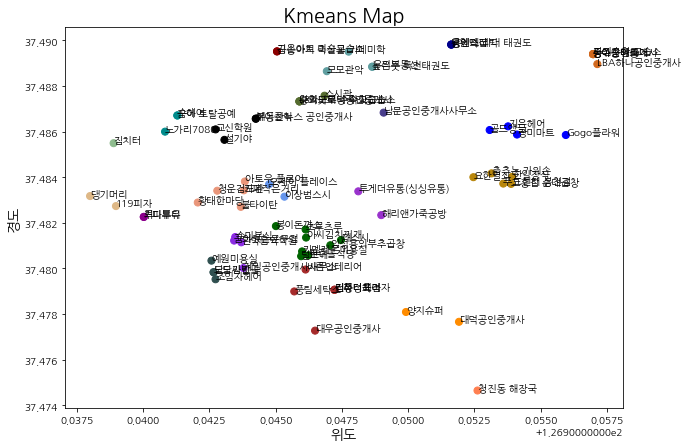

In [6]:
from data.arterior import KMeansFunctions
kmeans = KMeansFunctions()
# table = kmeans.kmeans(table, 22)
# table.to_csv('data/stores_part_rest_kmeans.csv', index=None)
table = pd.read_csv('data/stores023_kmeans.csv')
table = table.rename(columns={'cluster': 'kmeans'},)
kmeans.ploting_table(table, fig_size=(10,7))

In [7]:
from data.arterior import MapFolium
maplot = MapFolium()
map_instance = maplot.plot(table, number='kmeans', opacity=0.8)
# map_instance.save('data/foliumap.html')
table.head(3)

,title,no,part,address,dong,name,phone,telephone,order,lon,lat,color,display,kmeans
0,동아홈마트,180-14-01184,슈퍼마켓,관악로 287 상가동 B113,성현동,김상련,010-3137-1057,02-876-7845,미정(전문가 상의후 결정),126.956977,37.489398,chocolate,True,7
1,장미마트,112-35-24175,슈퍼마켓,은천로 170,중앙동,김미경,010-2475-6661,02-873-7509,내외부 공간 개선,126.954107,37.485869,blue,True,2
2,양지슈퍼,119-21-98098,슈퍼마켓,관악로11길 42,청룡동,천대현,010-7123-2637,02-889-2637,내외부 공간 개선,126.949915,37.478086,darkorange,True,16


## **2 Clustering the Data by Index**
- K means 로 구분한 내용을 기준으로 가게별 Index 구분하기
- 전체 22개의 구역으로 나누기
- 나머지 지역 필터링 2개 구역 22명: 3X7 + 4X4 = 37  

In [8]:
# K Means 로 구분한 내용을 바탕으로 지역 구분하기
# 0 : 8,16 
# 1 : 5,14
# 2 : 20,11
# 3 : 1
# 4 : 15
# 5 : 10, 21
# 6 : 22
# 7 : 5,14
# 8, 9: 18, 6
# 10, 11 : 9, 19
cluster_indexs = [
    # Group 2
    [7, 29,35,54],# 1
    [19,20,34,71],# 2
    [23,25,28,60],# 3
    [9, 26,33],   # 4
    [52,55,59],   # 5
    [27,49,57,61],# 6
    [0, 5, 48],   # 7
    [50,58,56],   # 8
    [1, 3, 24],   # 9
    [18,39,41],   # 10
    [38,40, 8],   # 11

    # Group 3
    [6, 12,13,22],# 12
    [43,44,45,47],# 13
    [30,31,32,51],# 14
    [2 ,17,46],    # 15
    [53,72,73],   # 16
    [4 ,65,15],   # 17
    [70,62,69],   # 18
    [64,66,67],   # 19
    [21,10,36],   # 20
    [37,63,68],   # 21
    [11,14,16,42],# 22        
]
# table['cluster'] = 0
# table.head(2)

In [9]:
from data.arterior import table_clusters
from data.arterior import MapFolium
maplot = MapFolium()

for no,_ in enumerate(cluster_indexs):
    table = table_clusters(table, _, no+1)
table['display'] = list(map(lambda x : True if (x == False) else False, table['display']))
table = table.reset_index()
map_instance = maplot.plot(table, number='cluster', opacity=0.8)
# map_instance.save('data/filter.html')

## **3 Checking The Data**
- 나머지 데이터 확인하기

In [10]:
result = []
from collections import Counter
for _ in cluster_indexs:
    result += _
for k,v in Counter(result).items():
    if v != 1:
        print(v, k) 
# table.to_csv('data/stores_part23.csv', index=None)


# **Merge Tables**
## **1 구역분할 완료데이터 정리하기**
```
(3 * 20) + (4 * 13) = 112
3*7 + 4*4 = 37
3*7 + 4*4 = 37
3*6 + 4*5 = 38
```

In [11]:
file1 = 'data/stores01_clust.csv'
file2 = 'data/stores023_clust.csv'

import pandas as pd
table = pd.read_csv(file1).drop(['index', 'label'], axis=1).rename(
    columns={'display': 'group'}).sort_values(by=['cluster']).reset_index(drop=True)
table['cluster'] = list(map(lambda x : int(x), table['cluster']))
table['group'] = '1'
table.tail(3)

,title,no,part,address,dong,name,phone,telephone,order,lon,lat,color,group,cluster
35,래몬헤어,502-44-76505,이·미용업,"은천로35, 1층 6호",보라매동,김경희,010-2693-7790,02-877-0989,"간판, 윈도우시트 등 협의",126.939241,37.486413,black,1,11
36,무지개 인테리어,119-19-92320,인테리어,국회단지길 19,보라매동,양동영,010-3724-3243,02-878-8787,"어닝교체, 가게로고",126.939527,37.487090,black,1,11
37,용국이네 숯불갈비,608-35-74050,음식점,은천로 41,은천동,신훈정,010-6440-8700,02-887-0953,"간판디자인, 메뉴판디자인",126.939987,37.486287,black,1,11


In [12]:
import pandas as pd
_table = pd.read_csv(file2).drop(['index', 'kmeans'], axis=1).rename(
    columns={'display': 'group'}).sort_values(by=['cluster']).reset_index(drop=True)
_table['cluster'] = list(map(lambda x : int(x), _table['cluster']))

# B, C Group 구분하기
_table['group'] = list(map(lambda x : "2" if (x < 12) else "3",  _table['cluster']))
table_index = _table[_table['group']=='3'].index
for _ in table_index:
    _table.loc[_, 'cluster'] = (_table.loc[_, 'cluster'] - 11)
_table.tail(3)

,title,no,part,address,dong,name,phone,telephone,order,lon,lat,color,group,cluster
71,임성용의부추곱창,757-07-01216,음식점,청룡3길 13-6,청룡동,임성용,010-8778-9686,02-871-6281,벽화(벽면 손님 방명록 옆으로),126.947061,37.481014,purple,3,11
72,전주골식당,119-09-81222,음식점,청룡길 27,청룡동,김판덕,010-6807-9076,02-885-4999,"수납공간, 벽지 오염 개선 등",126.946230,37.480576,purple,3,11
73,털보네,112-05-50375,음식점,청룡길 30,청룡동,전재희,010-5895-7357,02-873-7733,NaN,126.945959,37.480533,purple,3,11


In [13]:
table = pd.concat([table, _table]).reset_index(drop=True)
table['store'] = 0

# 가게별 구분숫자 추가하기
for _group in table['group'].unique(): # Group 구분
    index_list = table[table['group'] == _group].index
    _table = table.loc[index_list,:]
    # print(_table.shape)
    for _ in _table['cluster'].unique():
        count = 1
        table_index = _table[_table['cluster']==_].index
        for _index in table_index:
            table.loc[_index, 'store'] = count
            count += 1
        
table.to_csv('data/stores_clust.csv', index=None)
table.tail(3)

,title,no,part,address,dong,name,phone,telephone,order,lon,lat,color,group,cluster,store
109,임성용의부추곱창,757-07-01216,음식점,청룡3길 13-6,청룡동,임성용,010-8778-9686,02-871-6281,벽화(벽면 손님 방명록 옆으로),126.947061,37.481014,purple,3,11,2
110,전주골식당,119-09-81222,음식점,청룡길 27,청룡동,김판덕,010-6807-9076,02-885-4999,"수납공간, 벽지 오염 개선 등",126.946230,37.480576,purple,3,11,3
111,털보네,112-05-50375,음식점,청룡길 30,청룡동,전재희,010-5895-7357,02-873-7733,NaN,126.945959,37.480533,purple,3,11,4


## **2 Visualization**


In [14]:
from data.arterior import MapFolium
maplot = MapFolium()
map_instance = maplot.plot_circle(table, title='cluster', zoom=14)
map_instance.save('data/map.html')